In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Data Import and Initial Examination
Examine variables such as Dt_Customer and Income to verify their accurate importation.

In [3]:
# Load the data
df = pd.read_csv('marketing_data.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First 5 rows:")
df.head()

Dataset Shape: (2240, 28)

First 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [4]:
# Check data types and info
print("Data Types and Non-Null Counts:")
print("="*50)
df.info()

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    22

In [5]:
# Examine the Income column - note it has $ and comma formatting
print("Income column examination:")
print("Sample values:", df[' Income '].head(10).tolist())
print("\nData type:", df[' Income '].dtype)
print("\nMissing values:", df[' Income '].isna().sum())

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()
print("\nCleaned column names:", df.columns.tolist())

Income column examination:
Sample values: ['$84,835.00 ', '$57,091.00 ', '$67,267.00 ', '$32,474.00 ', '$21,474.00 ', '$71,691.00 ', '$63,564.00 ', '$44,931.00 ', '$65,324.00 ', '$65,324.00 ']

Data type: object

Missing values: 24

Cleaned column names: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [6]:
# Clean Income column - remove $, commas, and convert to numeric
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).str.strip()
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

print("Income column after cleaning:")
print("Data type:", df['Income'].dtype)
print("Sample values:", df['Income'].head(10).tolist())
print("\nStatistics:")
print(df['Income'].describe())

Income column after cleaning:
Data type: float64
Sample values: [84835.0, 57091.0, 67267.0, 32474.0, 21474.0, 71691.0, 63564.0, 44931.0, 65324.0, 65324.0]

Statistics:
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [7]:
# Examine and convert Dt_Customer to datetime
print("Dt_Customer column examination:")
print("Sample values:", df['Dt_Customer'].head(10).tolist())
print("\nData type before conversion:", df['Dt_Customer'].dtype)

# Convert to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

print("\nData type after conversion:", df['Dt_Customer'].dtype)
print("Date range:", df['Dt_Customer'].min(), "to", df['Dt_Customer'].max())

Dt_Customer column examination:
Sample values: ['6/16/14', '6/15/14', '5/13/14', '5/11/14', '4/8/14', '3/17/14', '1/29/14', '1/18/14', '1/11/14', '1/11/14']

Data type before conversion: object

Data type after conversion: datetime64[ns]
Date range: 2012-07-30 00:00:00 to 2014-06-29 00:00:00


## Step 2: Missing Value Imputation and Data Cleaning
Handle missing income values considering that customers with similar education and marital status tend to have comparable yearly incomes. Also clean Education and Marital_Status categories.

In [8]:
# Check missing values across all columns
print("Missing Values Summary:")
print("="*50)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)
print(f"\nTotal missing Income values: {df['Income'].isna().sum()}")

Missing Values Summary:
Income    24
dtype: int64

Total missing Income values: 24


In [9]:
# Examine Education and Marital_Status categories
print("Education Categories:")
print(df['Education'].value_counts())
print("\n" + "="*50)
print("\nMarital Status Categories:")
print(df['Marital_Status'].value_counts())

Education Categories:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital Status Categories:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [10]:
# Clean Marital Status - consolidate similar categories
# 'Alone' and 'YOLO' can be considered similar to 'Single'
# 'Absurd' is unclear - treat as missing or single
marital_mapping = {
    'Single': 'Single',
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',  # Cleaning unusual entry
    'YOLO': 'Single'     # Cleaning unusual entry
}

df['Marital_Status_Clean'] = df['Marital_Status'].map(marital_mapping)

print("Cleaned Marital Status Categories:")
print(df['Marital_Status_Clean'].value_counts())
print("\nOriginal vs Cleaned mapping complete!")

Cleaned Marital Status Categories:
Marital_Status_Clean
Partner    1444
Single      796
Name: count, dtype: int64

Original vs Cleaned mapping complete!


In [11]:
# Impute missing Income values based on Education and Marital Status groups
# Calculate mean income for each group
income_by_group = df.groupby(['Education', 'Marital_Status_Clean'])['Income'].transform('mean')

# Fill missing values with group means
df['Income'] = df['Income'].fillna(income_by_group)

# Check if any missing values remain
remaining_missing = df['Income'].isna().sum()
print(f"Missing Income values after imputation: {remaining_missing}")

# If any still missing (group not represented), fill with overall median
if remaining_missing > 0:
    df['Income'] = df['Income'].fillna(df['Income'].median())
    print(f"Remaining missing filled with overall median")

print("\nIncome Statistics after imputation:")
print(df['Income'].describe())

Missing Income values after imputation: 0

Income Statistics after imputation:
count      2240.000000
mean      52253.168740
std       25039.376549
min        1730.000000
25%       35538.750000
50%       51650.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


## Step 3: Feature Engineering
Create variables for total number of children, age, total spending, and total purchases.

In [12]:
# Create new features

# 1. Total number of children (Kids + Teens)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# 2. Age (calculated from Year_Birth - using 2014 as reference based on Dt_Customer dates)
reference_year = 2014
df['Age'] = reference_year - df['Year_Birth']

# 3. Total Spending (sum of all product amounts)
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)

# 4. Total Purchases (sum of all purchase channels)
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_columns].sum(axis=1)

# 5. Total Accepted Campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Campaigns_Accepted'] = df[campaign_columns].sum(axis=1)

# Display summary of new features
print("New Features Created:")
print("="*50)
print(f"\nTotal Children: {df['Total_Children'].describe()}")
print(f"\nAge: {df['Age'].describe()}")
print(f"\nTotal Spending: {df['Total_Spending'].describe()}")
print(f"\nTotal Purchases: {df['Total_Purchases'].describe()}")

New Features Created:

Total Children: count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Total_Children, dtype: float64

Age: count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

Total Spending: count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Spending, dtype: float64

Total Purchases: count    2240.000000
mean       12.537054
std         7.205741
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Total_Purchases, dtype: float64


In [13]:
# Verify the new features
df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases', 'Total_Campaigns_Accepted']].head(10)

,Total_Children,Age,Total_Spending,Total_Purchases,Total_Campaigns_Accepted
0,0,44,1190,14,1
1,0,53,577,17,2
2,1,56,251,10,0
3,2,47,11,3,0
4,1,25,91,6,2
5,0,56,1192,16,1
6,0,60,1215,27,2
7,1,47,96,6,0
8,1,60,544,17,0
9,1,60,544,17,0


## Step 4: Exploratory Data Analysis - Distributions and Outliers
Generate box plots and histograms to gain insights into the distributions and identify outliers.

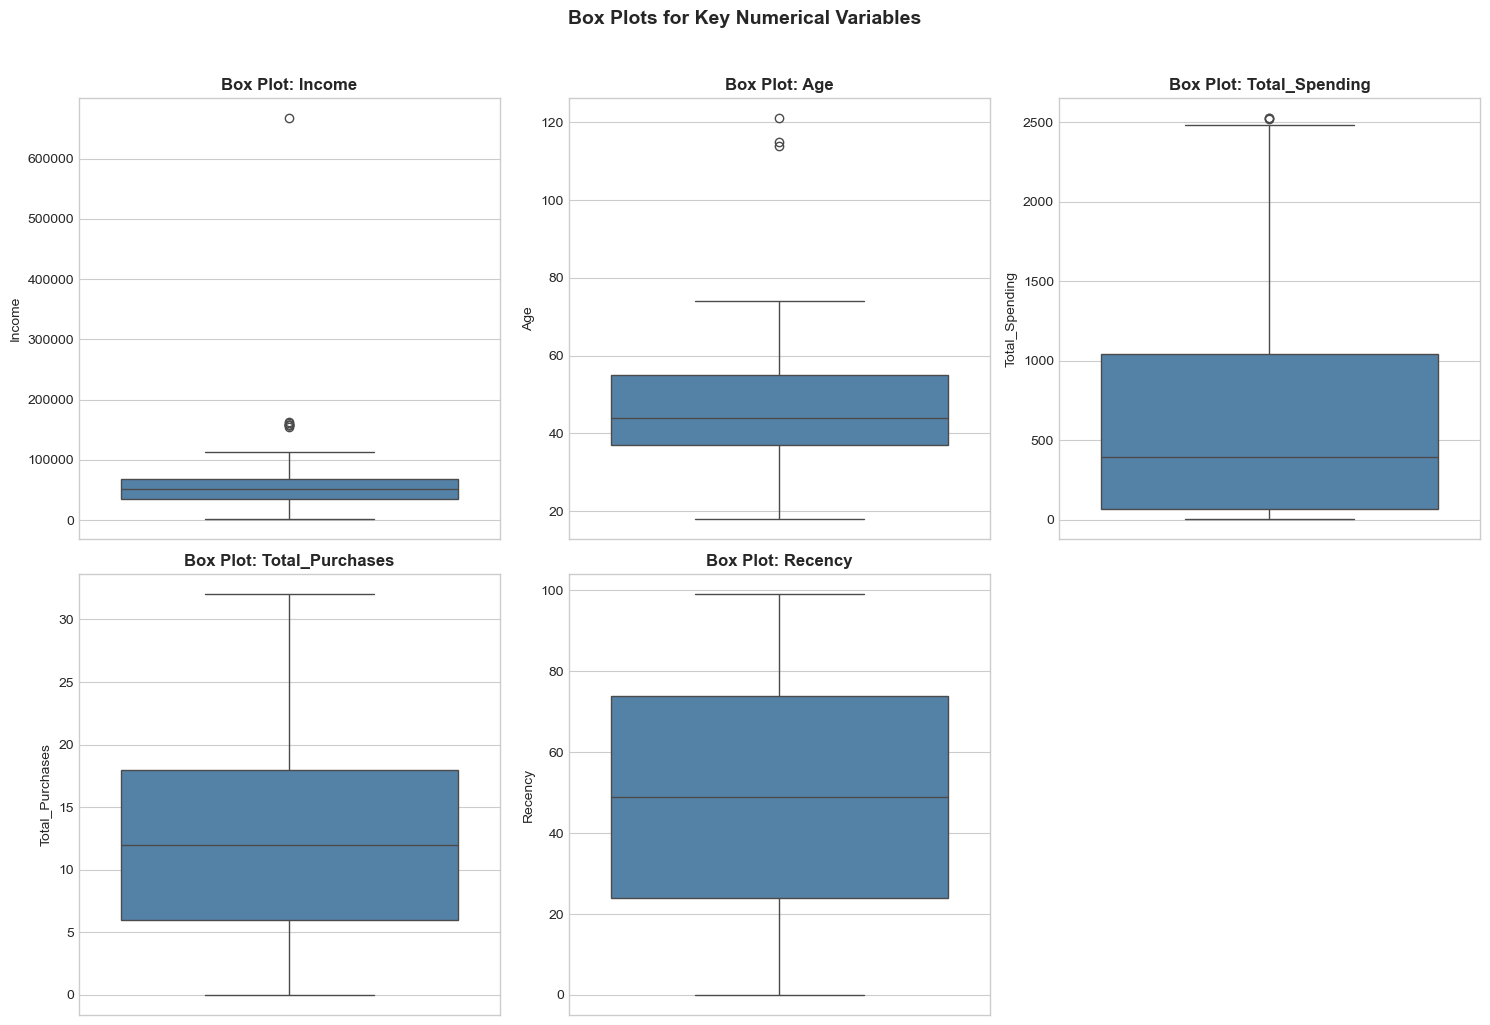

In [14]:
# Box plots for key numerical variables
numerical_cols = ['Income', 'Age', 'Total_Spending', 'Total_Purchases', 'Recency']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)

axes[-1].axis('off')  # Hide the 6th subplot
plt.suptitle('Box Plots for Key Numerical Variables', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

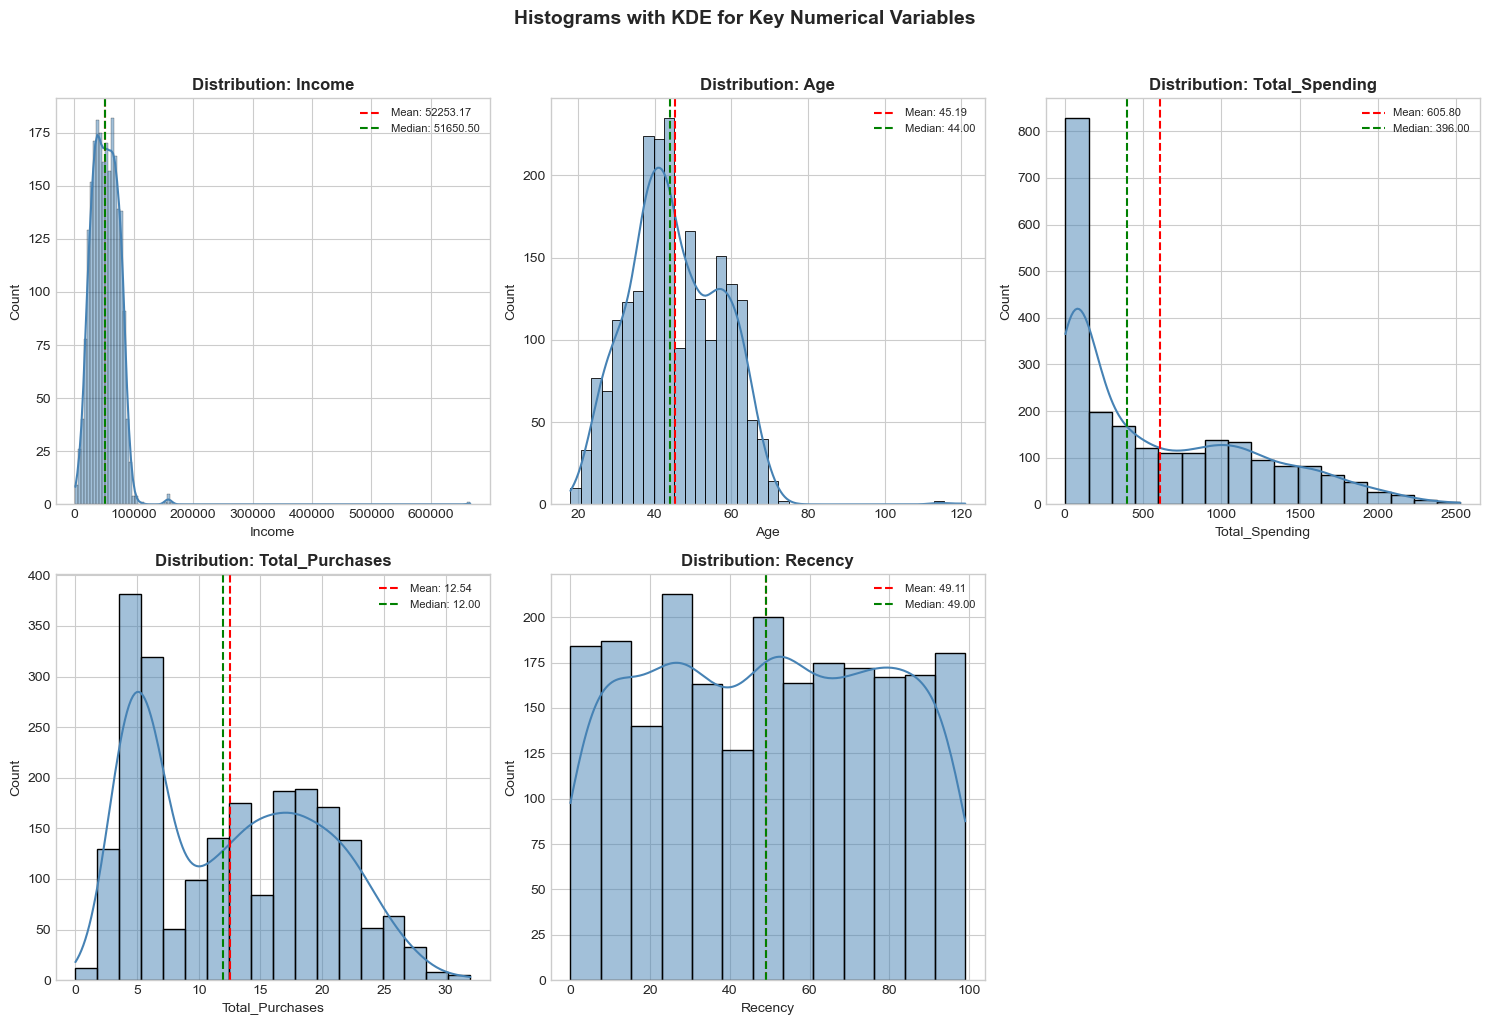

In [15]:
# Histograms for key numerical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[idx], kde=True, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[idx].legend(fontsize=8)

axes[-1].axis('off')
plt.suptitle('Histograms with KDE for Key Numerical Variables', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

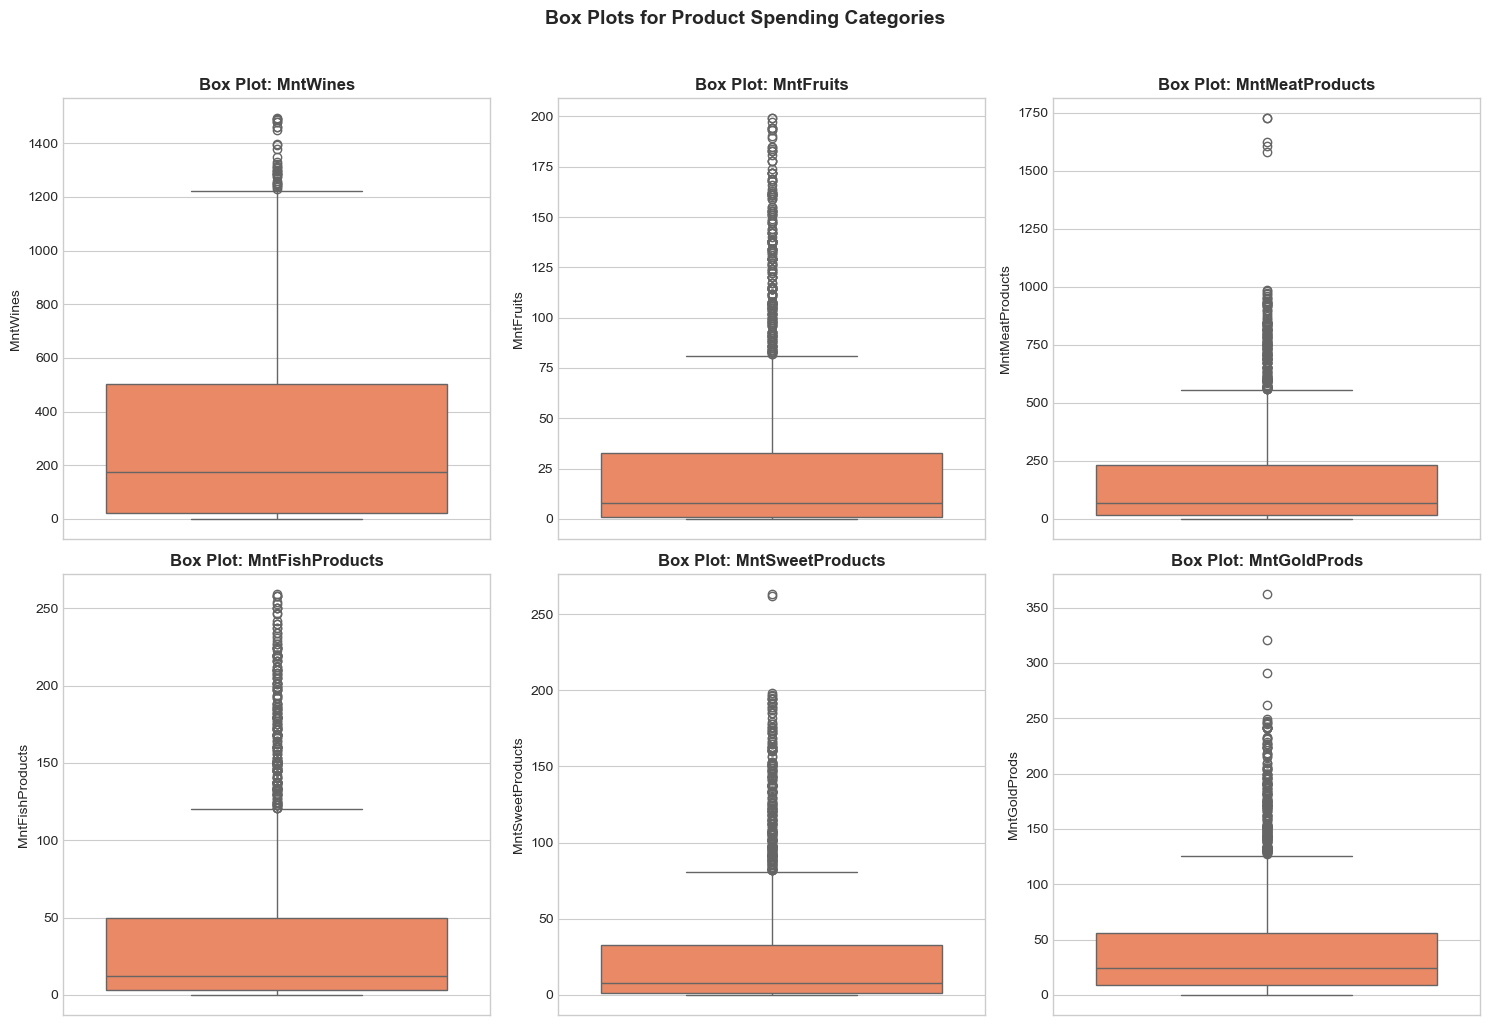

In [16]:
# Box plots for spending categories
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(spending_columns):
    sns.boxplot(y=df[col], ax=axes[idx], color='coral')
    axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)

plt.suptitle('Box Plots for Product Spending Categories', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [17]:
# Identify outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Outlier Analysis (IQR Method):")
print("="*70)
outlier_cols = ['Income', 'Age', 'Total_Spending', 'Year_Birth']

for col in outlier_cols:
    count, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}:")
    print(f"  - Outliers: {count}")
    print(f"  - Valid Range: [{lower:.2f}, {upper:.2f}]")
    print()

Outlier Analysis (IQR Method):
Income:
  - Outliers: 8
  - Valid Range: [-13587.75, 117416.25]

Age:
  - Outliers: 3
  - Valid Range: [10.00, 82.00]

Total_Spending:
  - Outliers: 3
  - Valid Range: [-1396.38, 2510.62]

Year_Birth:
  - Outliers: 3
  - Valid Range: [1932.00, 2004.00]



In [18]:
# Outlier treatment for Age and Income
# Remove extremely unrealistic ages (e.g., > 100 years or < 18 years based on Year_Birth)
print("Before outlier treatment:")
print(f"Dataset shape: {df.shape}")
print(f"Age range: {df['Age'].min()} - {df['Age'].max()}")
print(f"Income range: {df['Income'].min()} - {df['Income'].max()}")

# Filter out unrealistic ages
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Cap Income outliers at 99th percentile (instead of removing)
income_99 = df['Income'].quantile(0.99)
df['Income'] = df['Income'].clip(upper=income_99)

print("\nAfter outlier treatment:")
print(f"Dataset shape: {df.shape}")
print(f"Age range: {df['Age'].min()} - {df['Age'].max()}")
print(f"Income range: {df['Income'].min()} - {df['Income'].max()}")

Before outlier treatment:
Dataset shape: (2240, 34)
Age range: 18 - 121
Income range: 1730.0 - 666666.0

After outlier treatment:
Dataset shape: (2237, 34)
Age range: 18 - 74
Income range: 1730.0 - 94440.31999999999


## Step 5: Categorical Variable Encoding
Apply ordinal encoding for Education (has natural order) and one-hot encoding for nominal variables.

In [19]:
# Ordinal Encoding for Education (has natural order)
# Order: Basic -> 2n Cycle -> Graduation -> Master -> PhD
education_order = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

df['Education_Ordinal'] = df['Education'].map(education_order)

print("Education Ordinal Encoding:")
print(df[['Education', 'Education_Ordinal']].drop_duplicates().sort_values('Education_Ordinal'))

Education Ordinal Encoding:
     Education  Education_Ordinal
54       Basic                  1
6     2n Cycle                  2
0   Graduation                  3
11      Master                  4
5          PhD                  5


In [20]:
# One-Hot Encoding for nominal variables (Country, Marital_Status)
# Create one-hot encoded columns for Country
country_dummies = pd.get_dummies(df['Country'], prefix='Country', drop_first=False)
print("One-Hot Encoding for Country:")
print(country_dummies.head())

# Create one-hot encoded columns for Marital_Status_Clean
marital_dummies = pd.get_dummies(df['Marital_Status_Clean'], prefix='Marital', drop_first=False)
print("\nOne-Hot Encoding for Marital Status (Cleaned):")
print(marital_dummies.head())

One-Hot Encoding for Country:
   Country_AUS  Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
0        False       False        False        False       False       False   
1        False        True        False        False       False       False   
2        False       False        False        False       False       False   
3         True       False        False        False       False       False   
4        False       False        False        False       False       False   

   Country_SP  Country_US  
0        True       False  
1       False       False  
2       False        True  
3       False       False  
4        True       False  

One-Hot Encoding for Marital Status (Cleaned):
   Marital_Partner  Marital_Single
0            False            True
1            False            True
2             True           False
3             True           False
4            False            True


In [21]:
# Concatenate encoded columns to dataframe
df_encoded = pd.concat([df, country_dummies, marital_dummies], axis=1)

print("Encoded DataFrame Shape:", df_encoded.shape)
print("\nNew columns added:")
print(list(country_dummies.columns) + list(marital_dummies.columns))

Encoded DataFrame Shape: (2237, 45)

New columns added:
['Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US', 'Marital_Partner', 'Marital_Single']


## Step 6: Correlation Analysis
Generate a heatmap to illustrate the correlation between different pairs of variables.

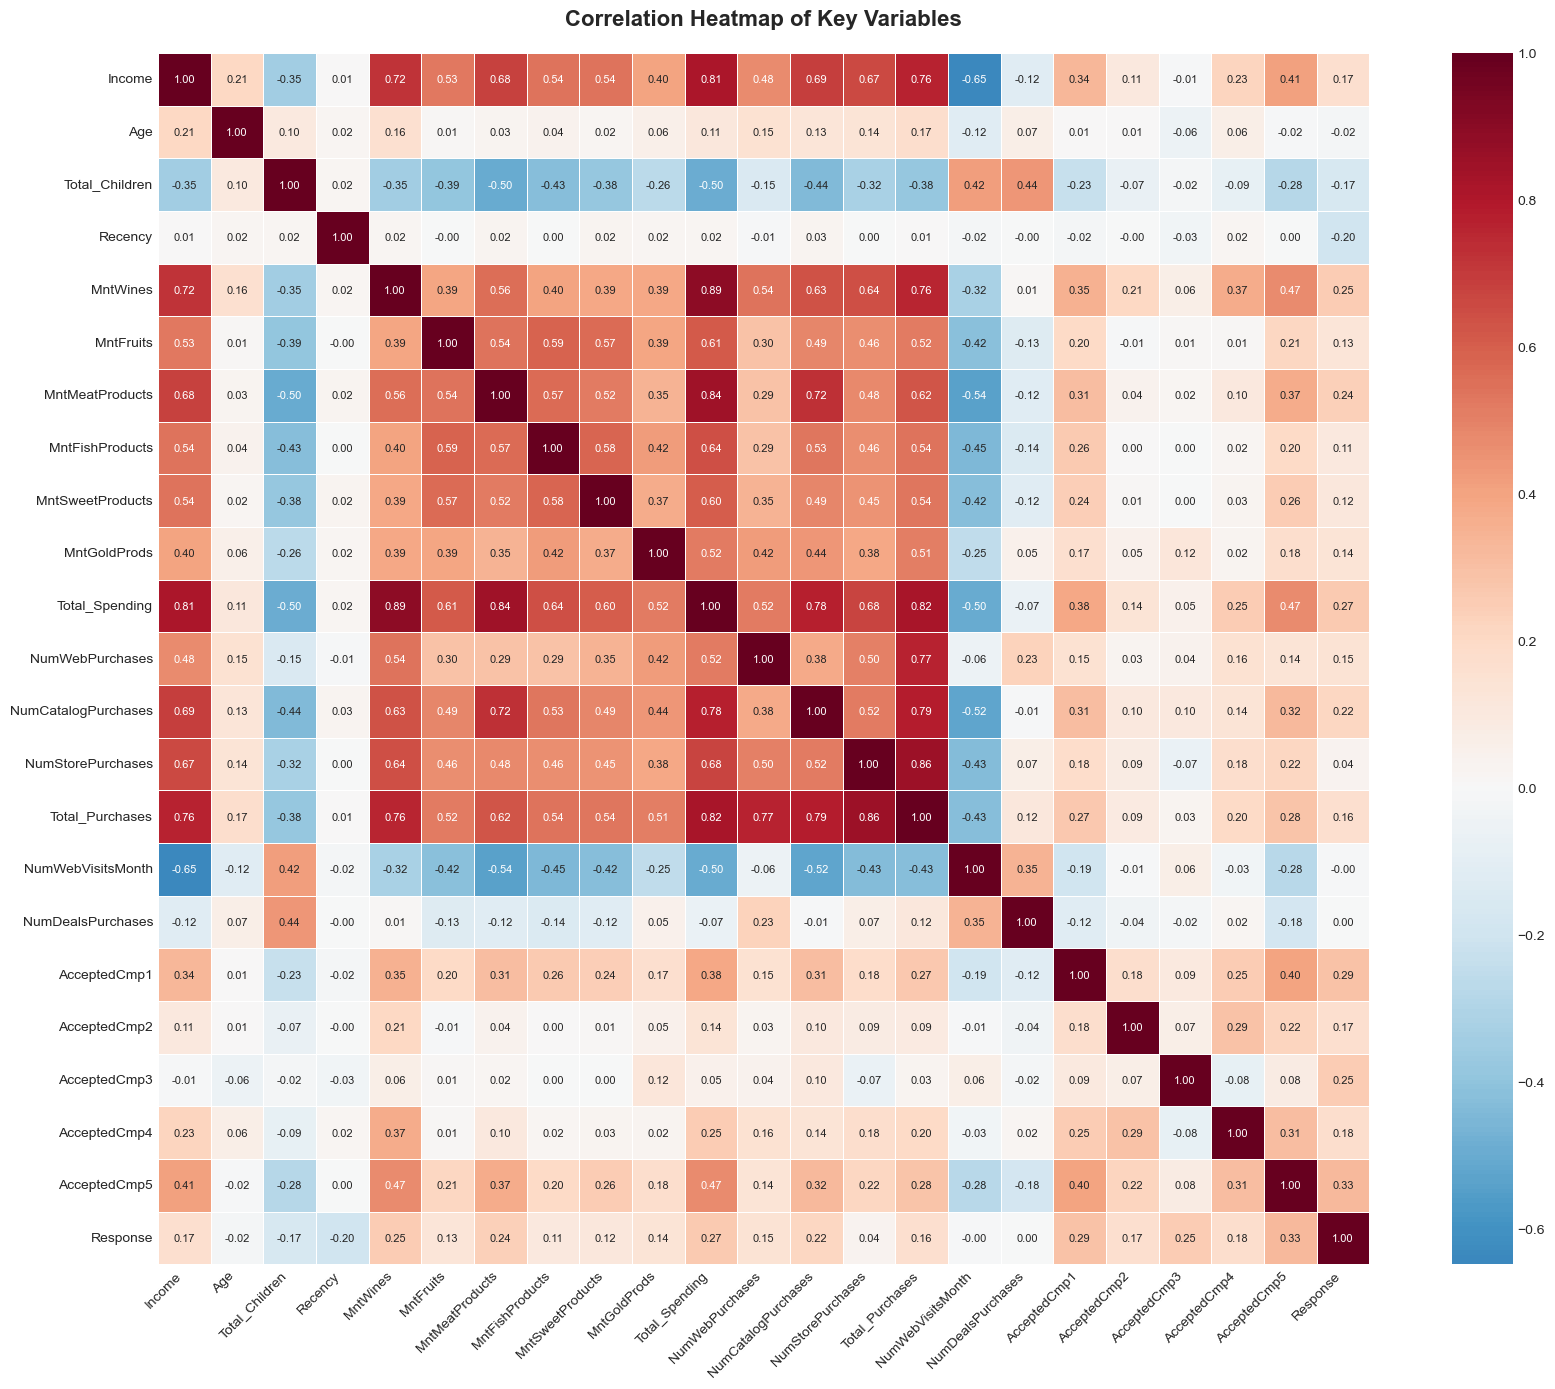

In [22]:
# Select key numerical variables for correlation analysis
correlation_cols = [
    'Income', 'Age', 'Total_Children', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'Total_Spending', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'Total_Purchases', 'NumWebVisitsMonth', 'NumDealsPurchases',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'
]

# Calculate correlation matrix
corr_matrix = df[correlation_cols].corr()

# Create heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', 
            linewidths=0.5, square=True, annot_kws={'size': 8})
plt.title('Correlation Heatmap of Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# Identify strongest correlations (excluding self-correlations)
# Flatten the correlation matrix and get top correlations
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Variable 1': corr_matrix.columns[i],
            'Variable 2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

print("Top 15 Strongest Correlations:")
print("="*70)
print(corr_df.head(15).to_string(index=False))

Top 15 Strongest Correlations:
         Variable 1          Variable 2  Correlation  Abs_Correlation
           MntWines      Total_Spending     0.891734         0.891734
  NumStorePurchases     Total_Purchases     0.855399         0.855399
    MntMeatProducts      Total_Spending     0.842655         0.842655
     Total_Spending     Total_Purchases     0.821143         0.821143
             Income      Total_Spending     0.813070         0.813070
NumCatalogPurchases     Total_Purchases     0.785639         0.785639
     Total_Spending NumCatalogPurchases     0.778375         0.778375
    NumWebPurchases     Total_Purchases     0.765720         0.765720
             Income     Total_Purchases     0.763165         0.763165
           MntWines     Total_Purchases     0.756494         0.756494
    MntMeatProducts NumCatalogPurchases     0.723519         0.723519
             Income            MntWines     0.716946         0.716946
             Income NumCatalogPurchases     0.688692       

## Step 7: Hypothesis Testing

### Hypothesis 7a: Older individuals may prefer in-store shopping over online
**H0:** There is no significant difference in in-store vs web purchases between older and younger customers
**H1:** Older individuals make relatively more in-store purchases than web purchases

In [24]:
# Hypothesis 7a: Older individuals prefer in-store shopping
# Define age groups
median_age = df['Age'].median()
df['Age_Group'] = df['Age'].apply(lambda x: 'Older' if x >= median_age else 'Younger')

# Calculate store-to-web purchase ratio
df['Store_Web_Ratio'] = df['NumStorePurchases'] / (df['NumWebPurchases'] + 1)  # +1 to avoid division by zero

# Compare ratios between age groups
older_group = df[df['Age_Group'] == 'Older']['Store_Web_Ratio']
younger_group = df[df['Age_Group'] == 'Younger']['Store_Web_Ratio']

print("Hypothesis 7a: Older Individuals Prefer In-Store Shopping")
print("="*60)
print(f"\nMedian Age (cutoff): {median_age}")
print(f"\nOlder Group (Age >= {median_age}):")
print(f"  - Mean Store/Web Ratio: {older_group.mean():.4f}")
print(f"  - Mean Store Purchases: {df[df['Age_Group'] == 'Older']['NumStorePurchases'].mean():.2f}")
print(f"  - Mean Web Purchases: {df[df['Age_Group'] == 'Older']['NumWebPurchases'].mean():.2f}")

print(f"\nYounger Group (Age < {median_age}):")
print(f"  - Mean Store/Web Ratio: {younger_group.mean():.4f}")
print(f"  - Mean Store Purchases: {df[df['Age_Group'] == 'Younger']['NumStorePurchases'].mean():.2f}")
print(f"  - Mean Web Purchases: {df[df['Age_Group'] == 'Younger']['NumWebPurchases'].mean():.2f}")

# Independent samples t-test
t_stat, p_value = stats.ttest_ind(older_group, younger_group)
print(f"\nIndependent Samples T-Test:")
print(f"  - T-statistic: {t_stat:.4f}")
print(f"  - P-value: {p_value:.4f}")
print(f"\nConclusion: {'Reject H0 - Older individuals significantly prefer in-store shopping' if p_value < 0.05 else 'Fail to reject H0 - No significant difference'}")

Hypothesis 7a: Older Individuals Prefer In-Store Shopping

Median Age (cutoff): 44.0

Older Group (Age >= 44.0):
  - Mean Store/Web Ratio: 1.2736
  - Mean Store Purchases: 6.23
  - Mean Web Purchases: 4.47

Younger Group (Age < 44.0):
  - Mean Store/Web Ratio: 1.2353
  - Mean Store Purchases: 5.33
  - Mean Web Purchases: 3.68

Independent Samples T-Test:
  - T-statistic: 1.4190
  - P-value: 0.1560

Conclusion: Fail to reject H0 - No significant difference


### Hypothesis 7b: Customers with children prefer online shopping
**H0:** There is no significant difference in web purchases between customers with and without children
**H1:** Customers with children make more web purchases (convenience)

In [25]:
# Hypothesis 7b: Customers with children prefer online shopping
df['Has_Children'] = df['Total_Children'].apply(lambda x: 'With Children' if x > 0 else 'No Children')

with_children = df[df['Has_Children'] == 'With Children']['NumWebPurchases']
without_children = df[df['Has_Children'] == 'No Children']['NumWebPurchases']

print("Hypothesis 7b: Customers with Children Prefer Online Shopping")
print("="*60)
print(f"\nWith Children:")
print(f"  - Count: {len(with_children)}")
print(f"  - Mean Web Purchases: {with_children.mean():.2f}")
print(f"  - Median Web Purchases: {with_children.median():.2f}")

print(f"\nWithout Children:")
print(f"  - Count: {len(without_children)}")
print(f"  - Mean Web Purchases: {without_children.mean():.2f}")
print(f"  - Median Web Purchases: {without_children.median():.2f}")

# Mann-Whitney U test (non-parametric alternative)
u_stat, p_value = stats.mannwhitneyu(with_children, without_children, alternative='two-sided')
print(f"\nMann-Whitney U Test:")
print(f"  - U-statistic: {u_stat:.4f}")
print(f"  - P-value: {p_value:.4f}")

# Also check web visits per month
print(f"\nAdditional: Web Visits per Month")
print(f"  - With Children: {df[df['Has_Children'] == 'With Children']['NumWebVisitsMonth'].mean():.2f}")
print(f"  - Without Children: {df[df['Has_Children'] == 'No Children']['NumWebVisitsMonth'].mean():.2f}")

print(f"\nConclusion: {'Reject H0 - Significant difference in web purchases' if p_value < 0.05 else 'Fail to reject H0 - No significant difference'}")

Hypothesis 7b: Customers with Children Prefer Online Shopping

With Children:
  - Count: 1600
  - Mean Web Purchases: 3.96
  - Median Web Purchases: 3.00

Without Children:
  - Count: 637
  - Mean Web Purchases: 4.39
  - Median Web Purchases: 4.00

Mann-Whitney U Test:
  - U-statistic: 435080.5000
  - P-value: 0.0000

Additional: Web Visits per Month
  - With Children: 6.05
  - Without Children: 3.48

Conclusion: Reject H0 - Significant difference in web purchases


### Hypothesis 7c: Sales at physical stores face cannibalization by alternative channels
**H0:** There is no significant negative correlation between store purchases and other channel purchases
**H1:** Increase in web/catalog purchases leads to decrease in store purchases (cannibalization)

In [26]:
# Hypothesis 7c: Store cannibalization by alternative channels
print("Hypothesis 7c: Store Sales Cannibalization by Alternative Channels")
print("="*60)

# Calculate correlations between store purchases and other channels
store_web_corr, store_web_p = stats.pearsonr(df['NumStorePurchases'], df['NumWebPurchases'])
store_catalog_corr, store_catalog_p = stats.pearsonr(df['NumStorePurchases'], df['NumCatalogPurchases'])

# Also create an "alternative channels" combined variable
df['Alt_Channels'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
store_alt_corr, store_alt_p = stats.pearsonr(df['NumStorePurchases'], df['Alt_Channels'])

print("\nCorrelation Analysis:")
print(f"\nStore vs Web Purchases:")
print(f"  - Pearson Correlation: {store_web_corr:.4f}")
print(f"  - P-value: {store_web_p:.4f}")

print(f"\nStore vs Catalog Purchases:")
print(f"  - Pearson Correlation: {store_catalog_corr:.4f}")
print(f"  - P-value: {store_catalog_p:.4f}")

print(f"\nStore vs Alternative Channels (Web + Catalog):")
print(f"  - Pearson Correlation: {store_alt_corr:.4f}")
print(f"  - P-value: {store_alt_p:.4f}")

# Interpretation
print("\n" + "="*60)
if store_alt_corr < 0 and store_alt_p < 0.05:
    print("Conclusion: EVIDENCE OF CANNIBALIZATION")
    print("Store purchases are negatively correlated with alternative channels")
elif store_alt_corr > 0 and store_alt_p < 0.05:
    print("Conclusion: NO EVIDENCE OF CANNIBALIZATION")
    print("Positive correlation suggests customers who buy more in one channel")
    print("tend to buy more across ALL channels (complementary effect)")
else:
    print("Conclusion: No significant relationship found")

Hypothesis 7c: Store Sales Cannibalization by Alternative Channels

Correlation Analysis:

Store vs Web Purchases:
  - Pearson Correlation: 0.5023
  - P-value: 0.0000

Store vs Catalog Purchases:
  - Pearson Correlation: 0.5189
  - P-value: 0.0000

Store vs Alternative Channels (Web + Catalog):
  - Pearson Correlation: 0.6153
  - P-value: 0.0000

Conclusion: NO EVIDENCE OF CANNIBALIZATION
Positive correlation suggests customers who buy more in one channel
tend to buy more across ALL channels (complementary effect)


### Hypothesis 7d: US significantly outperforms rest of the world in total purchases
**H0:** There is no significant difference in total purchases between US and other countries
**H1:** US customers have significantly higher total purchase volumes

In [27]:
# Hypothesis 7d: US vs Rest of World in Total Purchases
print("Hypothesis 7d: US vs Rest of World in Total Purchases")
print("="*60)

# Separate US and Non-US
us_purchases = df[df['Country'] == 'US']['Total_Purchases']
non_us_purchases = df[df['Country'] != 'US']['Total_Purchases']

print(f"\nUS Customers:")
print(f"  - Count: {len(us_purchases)}")
print(f"  - Mean Total Purchases: {us_purchases.mean():.2f}")
print(f"  - Median Total Purchases: {us_purchases.median():.2f}")
print(f"  - Std Dev: {us_purchases.std():.2f}")

print(f"\nNon-US Customers:")
print(f"  - Count: {len(non_us_purchases)}")
print(f"  - Mean Total Purchases: {non_us_purchases.mean():.2f}")
print(f"  - Median Total Purchases: {non_us_purchases.median():.2f}")
print(f"  - Std Dev: {non_us_purchases.std():.2f}")

# Independent samples t-test (one-tailed: US > non-US)
t_stat, p_value_two = stats.ttest_ind(us_purchases, non_us_purchases)
p_value_one = p_value_two / 2  # One-tailed test

print(f"\nIndependent Samples T-Test:")
print(f"  - T-statistic: {t_stat:.4f}")
print(f"  - P-value (two-tailed): {p_value_two:.4f}")
print(f"  - P-value (one-tailed, US > non-US): {p_value_one:.4f}")

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(us_purchases)-1)*us_purchases.std()**2 + (len(non_us_purchases)-1)*non_us_purchases.std()**2) / (len(us_purchases)+len(non_us_purchases)-2))
cohens_d = (us_purchases.mean() - non_us_purchases.mean()) / pooled_std
print(f"  - Cohen's d (effect size): {cohens_d:.4f}")

print(f"\nConclusion: {'Reject H0 - US significantly outperforms' if (p_value_one < 0.05 and t_stat > 0) else 'Fail to reject H0 - No significant difference or US does not outperform'}")

Hypothesis 7d: US vs Rest of World in Total Purchases

US Customers:
  - Count: 109
  - Mean Total Purchases: 13.51
  - Median Total Purchases: 13.00
  - Std Dev: 7.12

Non-US Customers:
  - Count: 2128
  - Mean Total Purchases: 12.49
  - Median Total Purchases: 12.00
  - Std Dev: 7.21

Independent Samples T-Test:
  - T-statistic: 1.4409
  - P-value (two-tailed): 0.1498
  - P-value (one-tailed, US > non-US): 0.0749
  - Cohen's d (effect size): 0.1415

Conclusion: Fail to reject H0 - No significant difference or US does not outperform


## Step 8: Visualization Analysis

### 8a: Top-performing Products and Lowest Revenue Products

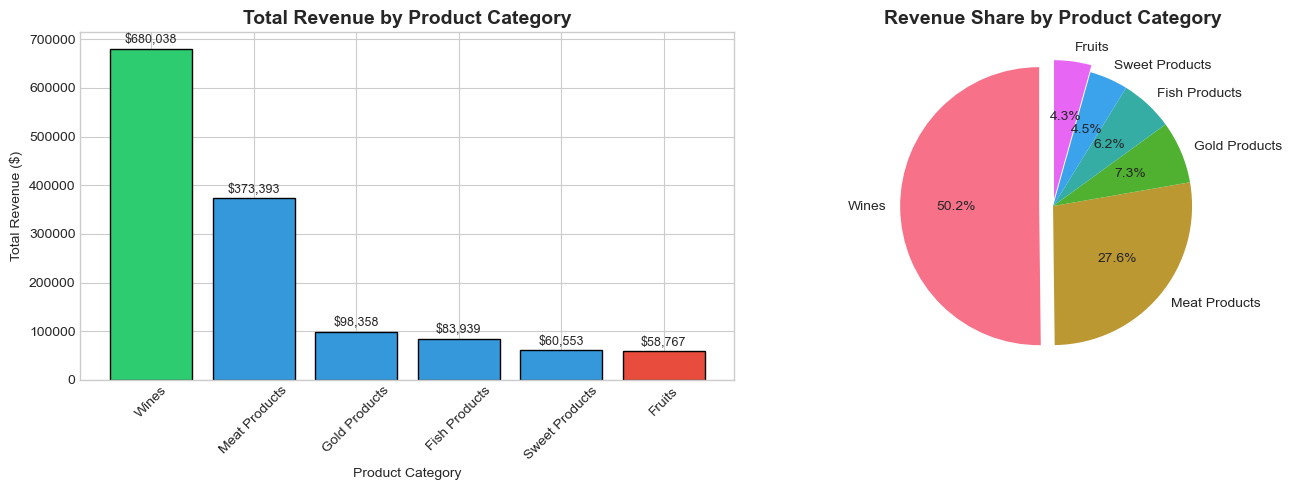


Product Revenue Ranking:
       Product  Total_Revenue
         Wines         680038
 Meat Products         373393
 Gold Products          98358
 Fish Products          83939
Sweet Products          60553
        Fruits          58767

Top Performer: Wines ($680,038)
Lowest Revenue: Fruits ($58,767)


In [28]:
# 8a: Top-performing and Lowest Revenue Products
product_revenue = {
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meat Products': df['MntMeatProducts'].sum(),
    'Fish Products': df['MntFishProducts'].sum(),
    'Sweet Products': df['MntSweetProducts'].sum(),
    'Gold Products': df['MntGoldProds'].sum()
}

product_df = pd.DataFrame(list(product_revenue.items()), columns=['Product', 'Total_Revenue'])
product_df = product_df.sort_values('Total_Revenue', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#2ecc71' if i == 0 else '#e74c3c' if i == len(product_df)-1 else '#3498db' 
          for i in range(len(product_df))]
bars = axes[0].bar(product_df['Product'], product_df['Total_Revenue'], color=colors, edgecolor='black')
axes[0].set_title('Total Revenue by Product Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)
for bar, val in zip(bars, product_df['Total_Revenue']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, 
                f'${val:,.0f}', ha='center', va='bottom', fontsize=9)

# Pie chart
explode = [0.1 if i == 0 else 0.05 if i == len(product_df)-1 else 0 for i in range(len(product_df))]
axes[1].pie(product_df['Total_Revenue'], labels=product_df['Product'], autopct='%1.1f%%',
            explode=explode, colors=sns.color_palette("husl", len(product_df)), startangle=90)
axes[1].set_title('Revenue Share by Product Category', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nProduct Revenue Ranking:")
print(product_df.to_string(index=False))
print(f"\nTop Performer: {product_df.iloc[0]['Product']} (${product_df.iloc[0]['Total_Revenue']:,.0f})")
print(f"Lowest Revenue: {product_df.iloc[-1]['Product']} (${product_df.iloc[-1]['Total_Revenue']:,.0f})")

### 8b: Correlation Between Age and Last Campaign Acceptance Rate

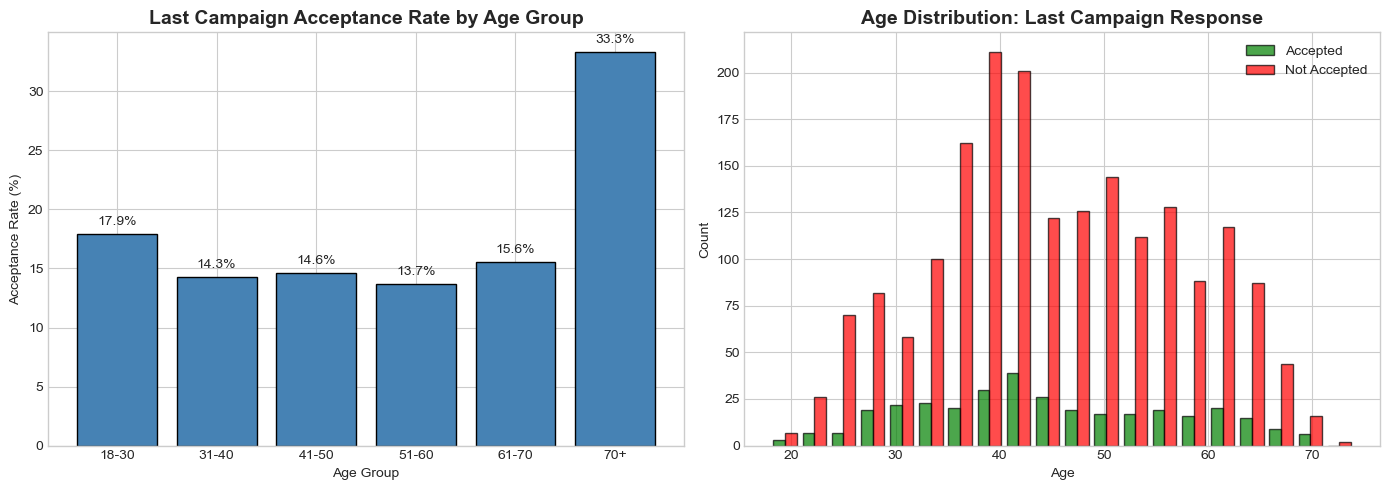


Acceptance Rate by Age Group:
         Accepted  Total  Acceptance_Rate
Age_Bin                                  
18-30          46    257            17.90
31-40          84    588            14.29
41-50          95    649            14.64
51-60          65    475            13.68
61-70          40    257            15.56
70+             3      9            33.33

Point-Biserial Correlation (Age vs Response): -0.0184
P-value: 0.3838


In [29]:
# 8b: Age vs Last Campaign Acceptance Rate
# Create age bins for analysis
df['Age_Bin'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70, 100], 
                       labels=['18-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Calculate acceptance rate by age group
age_acceptance = df.groupby('Age_Bin')['Response'].agg(['sum', 'count'])
age_acceptance['Acceptance_Rate'] = (age_acceptance['sum'] / age_acceptance['count'] * 100).round(2)
age_acceptance.columns = ['Accepted', 'Total', 'Acceptance_Rate']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of acceptance rate by age group
bars = axes[0].bar(age_acceptance.index.astype(str), age_acceptance['Acceptance_Rate'], 
                   color='steelblue', edgecolor='black')
axes[0].set_title('Last Campaign Acceptance Rate by Age Group', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Acceptance Rate (%)')
for bar, val in zip(bars, age_acceptance['Acceptance_Rate']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

# Scatter plot with trend line
accepted = df[df['Response'] == 1]['Age']
not_accepted = df[df['Response'] == 0]['Age']
axes[1].hist([accepted, not_accepted], bins=20, label=['Accepted', 'Not Accepted'], 
             color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[1].set_title('Age Distribution: Last Campaign Response', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nAcceptance Rate by Age Group:")
print(age_acceptance.to_string())

# Calculate correlation
corr, p_val = stats.pointbiserialr(df['Response'], df['Age'])
print(f"\nPoint-Biserial Correlation (Age vs Response): {corr:.4f}")
print(f"P-value: {p_val:.4f}")

### 8c: Country with Highest Number of Customers Accepting Last Campaign

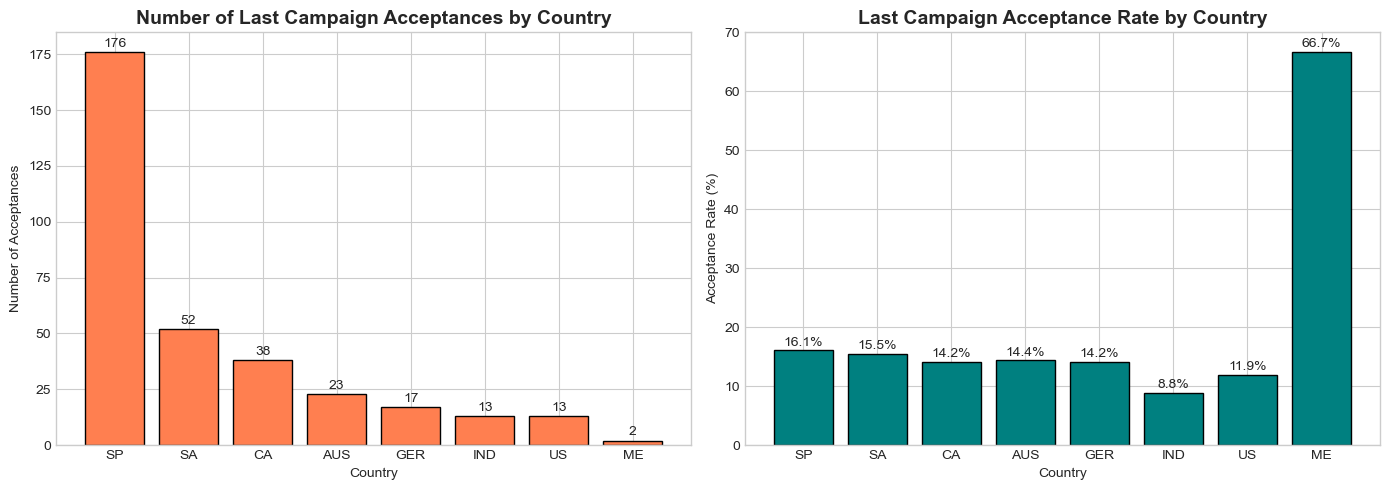


Country-wise Last Campaign Acceptance:
         Accepted  Total_Customers  Acceptance_Rate
Country                                            
SP            176             1094            16.09
SA             52              336            15.48
CA             38              268            14.18
AUS            23              160            14.37
GER            17              120            14.17
IND            13              147             8.84
US             13              109            11.93
ME              2                3            66.67

Country with Highest Acceptances: SP (176 acceptances)


In [30]:
# 8c: Country with highest last campaign acceptance
country_acceptance = df.groupby('Country')['Response'].agg(['sum', 'count'])
country_acceptance['Acceptance_Rate'] = (country_acceptance['sum'] / country_acceptance['count'] * 100).round(2)
country_acceptance.columns = ['Accepted', 'Total_Customers', 'Acceptance_Rate']
country_acceptance = country_acceptance.sort_values('Accepted', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart - Number of acceptances by country
bars = axes[0].bar(country_acceptance.index, country_acceptance['Accepted'], 
                   color='coral', edgecolor='black')
axes[0].set_title('Number of Last Campaign Acceptances by Country', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Acceptances')
for bar, val in zip(bars, country_acceptance['Accepted']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{int(val)}', ha='center', va='bottom', fontsize=10)

# Bar chart - Acceptance rate by country
bars2 = axes[1].bar(country_acceptance.index, country_acceptance['Acceptance_Rate'], 
                    color='teal', edgecolor='black')
axes[1].set_title('Last Campaign Acceptance Rate by Country', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Acceptance Rate (%)')
for bar, val in zip(bars2, country_acceptance['Acceptance_Rate']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\nCountry-wise Last Campaign Acceptance:")
print(country_acceptance.to_string())
print(f"\nCountry with Highest Acceptances: {country_acceptance.index[0]} ({int(country_acceptance['Accepted'].iloc[0])} acceptances)")

### 8d: Pattern in Number of Children at Home vs Total Expenditure

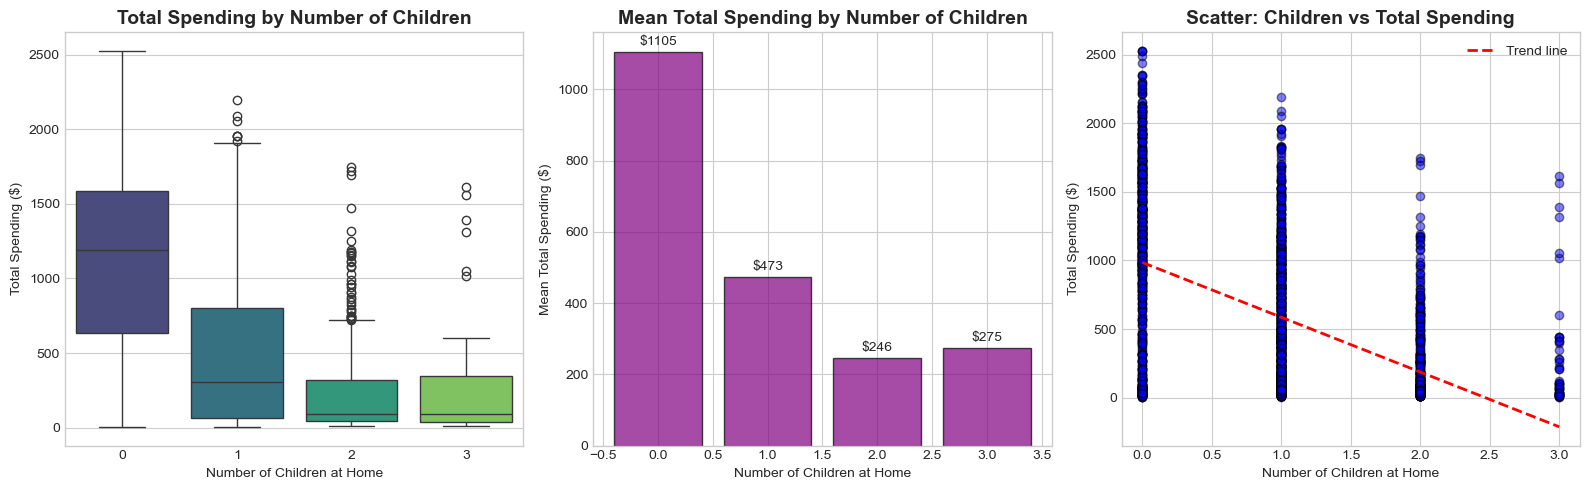


Spending Statistics by Number of Children:
                Mean_Spending  Median_Spending  Count
Total_Children                                       
0                 1104.857143           1189.0    637
1                  473.495560            306.0   1126
2                  245.947743             93.0    421
3                  274.603774             88.0     53

Pearson Correlation (Children vs Spending): -0.4985
P-value: 0.0000

Pattern: Negative correlation - More children = Less spending


In [31]:
# 8d: Children at Home vs Total Expenditure
children_spending = df.groupby('Total_Children')['Total_Spending'].agg(['mean', 'median', 'count'])
children_spending.columns = ['Mean_Spending', 'Median_Spending', 'Count']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Box plot
sns.boxplot(x='Total_Children', y='Total_Spending', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Total Spending by Number of Children', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Children at Home')
axes[0].set_ylabel('Total Spending ($)')

# Bar chart of mean spending
bars = axes[1].bar(children_spending.index, children_spending['Mean_Spending'], 
                   color='purple', edgecolor='black', alpha=0.7)
axes[1].set_title('Mean Total Spending by Number of Children', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Children at Home')
axes[1].set_ylabel('Mean Total Spending ($)')
for bar, val in zip(bars, children_spending['Mean_Spending']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                f'${val:.0f}', ha='center', va='bottom', fontsize=10)

# Scatter plot with trend
axes[2].scatter(df['Total_Children'], df['Total_Spending'], alpha=0.5, c='blue', edgecolor='k')
z = np.polyfit(df['Total_Children'], df['Total_Spending'], 1)
p = np.poly1d(z)
axes[2].plot(sorted(df['Total_Children'].unique()), p(sorted(df['Total_Children'].unique())), 
             "r--", linewidth=2, label=f'Trend line')
axes[2].set_title('Scatter: Children vs Total Spending', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Number of Children at Home')
axes[2].set_ylabel('Total Spending ($)')
axes[2].legend()

plt.tight_layout()
plt.show()

print("\nSpending Statistics by Number of Children:")
print(children_spending.to_string())

# Correlation
corr, p_val = stats.pearsonr(df['Total_Children'], df['Total_Spending'])
print(f"\nPearson Correlation (Children vs Spending): {corr:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"\nPattern: {'Negative correlation - More children = Less spending' if corr < 0 else 'Positive correlation - More children = More spending'}")

### 8e: Educational Background of Customers Who Complained in Last 2 Years

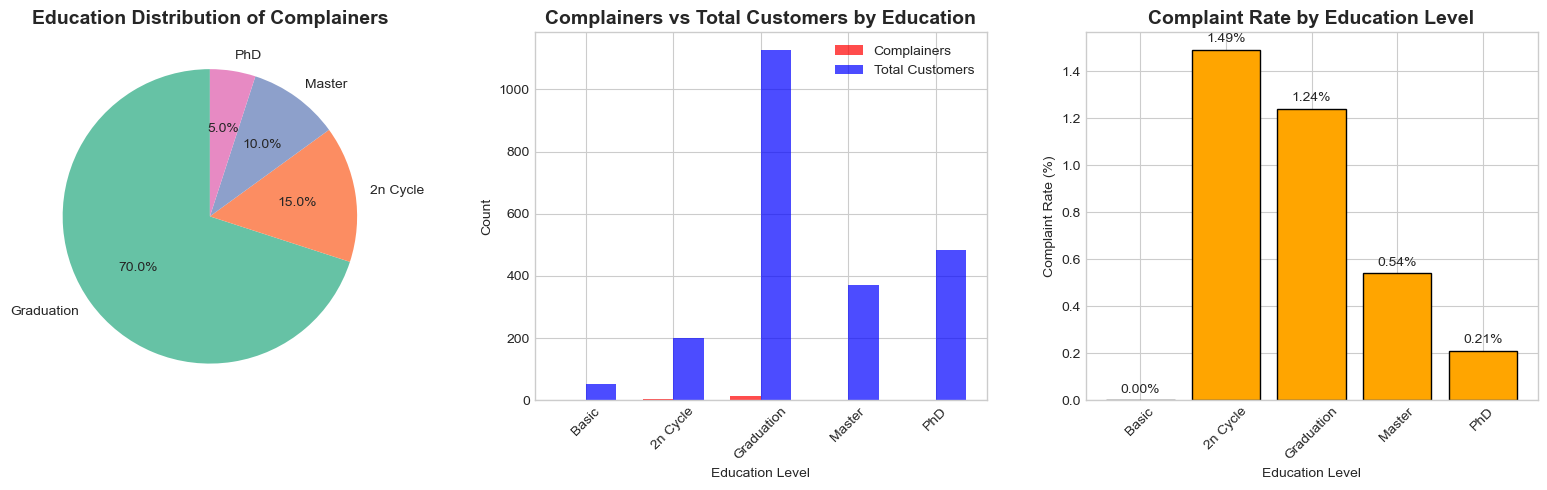


Complaint Analysis by Education Level:

Total Complainers: 20

Education Distribution of Complainers:
Education
Graduation    14
2n Cycle       3
Master         2
PhD            1

Complaint Rate by Education Level:
  Basic: 0.00%
  2n Cycle: 1.49%
  Graduation: 1.24%
  Master: 0.54%
  PhD: 0.21%


In [32]:
# 8e: Educational Background of Customers Who Complained
complainers = df[df['Complain'] == 1]
non_complainers = df[df['Complain'] == 0]

# Education distribution of complainers
complain_education = complainers['Education'].value_counts()
total_education = df['Education'].value_counts()

# Calculate complaint rate by education level
complaint_rate = (complain_education / total_education * 100).round(2)
complaint_rate = complaint_rate.fillna(0)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pie chart of complainers' education
axes[0].pie(complain_education, labels=complain_education.index, autopct='%1.1f%%',
            colors=sns.color_palette("Set2", len(complain_education)), startangle=90)
axes[0].set_title('Education Distribution of Complainers', fontsize=14, fontweight='bold')

# Bar chart comparing complainers vs non-complainers
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
x = np.arange(len(education_order))
width = 0.35

complain_counts = [complain_education.get(e, 0) for e in education_order]
total_counts = [total_education.get(e, 0) for e in education_order]

bars1 = axes[1].bar(x - width/2, complain_counts, width, label='Complainers', color='red', alpha=0.7)
bars2 = axes[1].bar(x + width/2, total_counts, width, label='Total Customers', color='blue', alpha=0.7)
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].set_title('Complainers vs Total Customers by Education', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(education_order, rotation=45)
axes[1].legend()

# Complaint rate by education
complaint_rate_ordered = [complaint_rate.get(e, 0) for e in education_order]
bars3 = axes[2].bar(education_order, complaint_rate_ordered, color='orange', edgecolor='black')
axes[2].set_title('Complaint Rate by Education Level', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Education Level')
axes[2].set_ylabel('Complaint Rate (%)')
axes[2].tick_params(axis='x', rotation=45)
for bar, val in zip(bars3, complaint_rate_ordered):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                f'{val:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\nComplaint Analysis by Education Level:")
print("="*50)
print(f"\nTotal Complainers: {len(complainers)}")
print(f"\nEducation Distribution of Complainers:")
print(complain_education.to_string())
print(f"\nComplaint Rate by Education Level:")
for edu in education_order:
    rate = complaint_rate.get(edu, 0)
    print(f"  {edu}: {rate:.2f}%")

In [34]:
# Final Summary Statistics
print("="*70)
print("FINAL DATASET SUMMARY")
print("="*70)

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"\n👥 Customer Demographics:")
print(f"   - Age Range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"   - Mean Income: ${df['Income'].mean():,.2f}")
print(f"   - Countries: {df['Country'].nunique()}")

print(f"\n🛒 Purchase Behavior:")
print(f"   - Mean Total Purchases: {df['Total_Purchases'].mean():.2f}")
print(f"   - Mean Total Spending: ${df['Total_Spending'].mean():,.2f}")
print(f"   - Store Purchases (mean): {df['NumStorePurchases'].mean():.2f}")
print(f"   - Web Purchases (mean): {df['NumWebPurchases'].mean():.2f}")
print(f"   - Catalog Purchases (mean): {df['NumCatalogPurchases'].mean():.2f}")

print(f"\n📢 Campaign Performance:")
print(f"   - Last Campaign Acceptance Rate: {df['Response'].mean()*100:.2f}%")
print(f"   - Total Campaigns Accepted (mean): {df['Total_Campaigns_Accepted'].mean():.2f}")

print(f"\n⚠️ Customer Issues:")
print(f"   - Total Complaints: {df['Complain'].sum()}")
print(f"   - Complaint Rate: {df['Complain'].mean()*100:.2f}%")



FINAL DATASET SUMMARY

📊 Dataset Shape: (2237, 40)

👥 Customer Demographics:
   - Age Range: 18 - 74 years
   - Mean Income: $51,755.70
   - Countries: 8

🛒 Purchase Behavior:
   - Mean Total Purchases: 12.54
   - Mean Total Spending: $605.74
   - Store Purchases (mean): 5.79
   - Web Purchases (mean): 4.09
   - Catalog Purchases (mean): 2.66

📢 Campaign Performance:
   - Last Campaign Acceptance Rate: 14.93%
   - Total Campaigns Accepted (mean): 0.45

⚠️ Customer Issues:
   - Total Complaints: 20
   - Complaint Rate: 0.89%
